# Convolutional Neural Network (CNN)

In [1]:
# How to read cells code from a Notebook
# import nbformat
# # Replace with your actual file path
# file_path = "C:\\Users\\ARSAMANT\\Downloads\\CNN (Dog & Cat)"
# # Load the notebook
# with open(file_path, 'r', encoding='utf-8') as f:
#     notebook = nbformat.read(f, as_version=4)
# # Display all cells
# for i, cell in enumerate(notebook.cells):
#     print(f"\n--- Cell {i+1} ({cell.cell_type}) ---")
#     print(cell.source)

In [2]:
# !pip install tensorboard

In [3]:
# !pip install opencv-python

In [4]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mohamedmaher5/vehicle-classification")

# print("Path to dataset files:", path)

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import *

import tensorflow as tf

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

import keras
from keras.activations import relu, linear
from keras.layers import Dense, Dropout,Input
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, TensorBoard
from keras.regularizers import L1, L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2, os
from keras.layers import Conv2D, MaxPool2D, Flatten
import datetime
import joblib

import requests
from PIL import Image
from io import BytesIO


In [49]:
from keras.applications.vgg16 import VGG16

In [6]:
print(tf.config.list_physical_devices())
tf.config.set_visible_devices([], 'GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Eaxmple

In [7]:
path = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Auto Rickshaws\Auto Rickshaw (50).jpg"

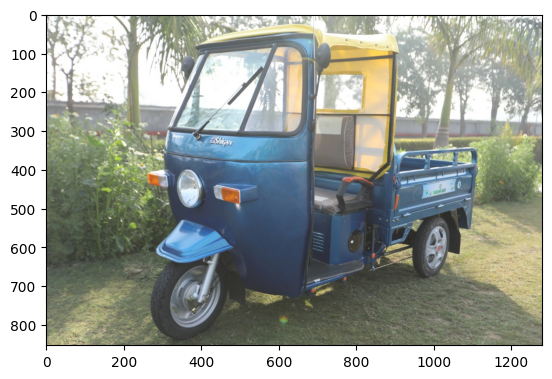

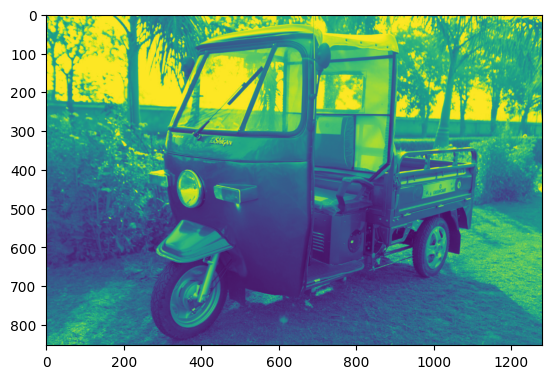

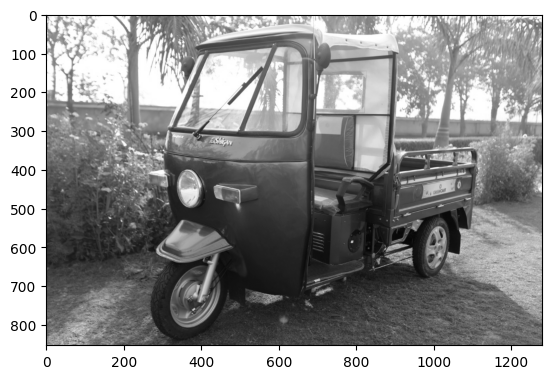

In [8]:
img = cv2.imread(path)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.show()
plt.imshow(gray_image, cmap='gray')
plt.show()

In [9]:
## Predefine image size and Directory

In [10]:
IMAGE_INPUT_SIZE = 150
dataset_dir = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data"
dataset_dir_test = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Testing Data"

## Folder Read

In [11]:
for folder_name in os.listdir(dataset_dir):
    print(folder_name)
    

Auto Rickshaws
Bikes
Bus
Cars
Cycles
No Vehicles
Truck


## Folder Path

In [12]:
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    print(folder_path)

C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Auto Rickshaws
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Bikes
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Bus
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Cars
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Cycles
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\No Vehicles
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Truck


## File Name

In [13]:
# for folder_name in os.listdir(dataset_dir):
#     folder_path = os.path.join(dataset_dir, folder_name)
#     for file_name in os.listdir(folder_path):
#         print(file_name)

## Image Read Function

In [14]:
def read_dataset(dataset_dir, image_size, encoder, is_fit_transform = False):
    X=[]
    Y=[]
    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir,folder_name)
        for file_name in os.listdir(folder_path):
            file_path  = os.path.join(folder_path,file_name)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
            img = img.reshape((IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1))            
            X.append(img)
            Y.append(folder_name)
    x = np.array(X)
    if is_fit_transform:
        y = encoder.fit_transform(Y)
    else:
        y = encoder.transform(Y)
    return x, y

## Encoder

In [15]:
encoder = LabelEncoder()
x,y = read_dataset(dataset_dir, IMAGE_INPUT_SIZE, encoder, is_fit_transform = True)

In [16]:
x_test, y_test = read_dataset(dataset_dir_test, IMAGE_INPUT_SIZE, encoder, is_fit_transform = False)

## Split

In [17]:
x_train,x_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(6379, 150, 150, 1)
(6379,)
(5103, 150, 150, 1)
(5103,)
(1276, 150, 150, 1)
(1276,)
(382, 150, 150, 1)
(382,)


In [18]:
print(len(os.listdir(dataset_dir)))

7


## Data Augmentation

In [19]:
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# traingenerator = datagen.flow(x_train, y_train, batch_size=30)

## Model

In [20]:
model = keras.Sequential([
    Input(shape=(IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1)),
    
    Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu'),   
    MaxPool2D(),

    Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'),  
    MaxPool2D(),                                                           

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
    MaxPool2D(),   

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
    MaxPool2D(), 
    
    Flatten(),
    
    Dense(150, activation='relu', kernel_regularizer=L1(l1=0.005)),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │       3,110,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,514,197 (13.41 MB)

 Trainable params: 3,514,197 (13.41 MB)

 Non-trainable params: 0 (0.00 B)

## Compile

In [22]:
o = Adam(learning_rate= 0.001)
model.compile(optimizer=o,loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Fit

In [23]:
History = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=25,
    validation_data = (x_val, y_val),
    callbacks=[
        EarlyStopping(monitor= 'val_accuracy', patience=5, verbose=1, restore_best_weights=True)
    ]
)

Epoch 1/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 57s 259ms/step - accuracy: 0.3028 - loss: 26.8288 - val_accuracy: 0.4083 - val_loss: 5.5771
Epoch 2/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.4774 - loss: 4.0214 - val_accuracy: 0.5400 - val_loss: 3.4549
Epoch 3/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 46s 222ms/step - accuracy: 0.5540 - loss: 3.3391 - val_accuracy: 0.5745 - val_loss: 3.3098
Epoch 4/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 45s 217ms/step - accuracy: 0.5961 - loss: 3.1788 - val_accuracy: 0.5980 - val_loss: 3.2258
Epoch 5/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - accuracy: 0.6316 - loss: 3.1158 - val_accuracy: 0.6481 - val_loss: 3.0175
Epoch 6/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 45s 219ms/step - accuracy: 0.6549 - loss: 3.0391 - val_accuracy: 0.6348 - val_loss: 3.1326
Epoch 7/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.6661 - loss: 2.9758 - val_accuracy: 0.6787 - val_loss: 2.9808
Epoch 8/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 42s 204ms/step - accuracy: 0.6767 - loss: 

## Plots

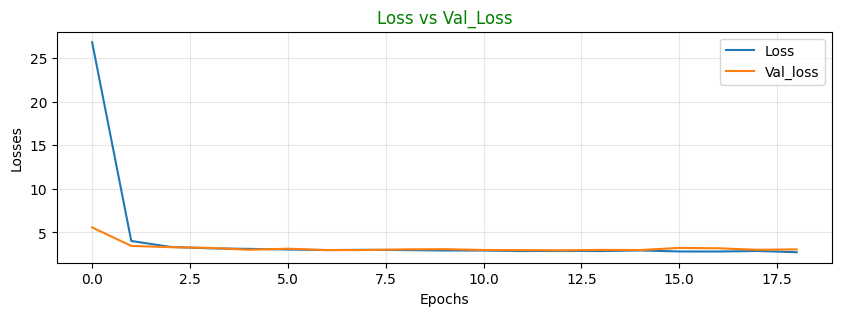

In [25]:
figsize = plt.figure(figsize=(10,3))
plt.plot(History.history['loss'], label='Loss')
plt.plot(History.history['val_loss'], label='Val_loss')
plt.title("Loss vs Val_Loss", color='g')
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

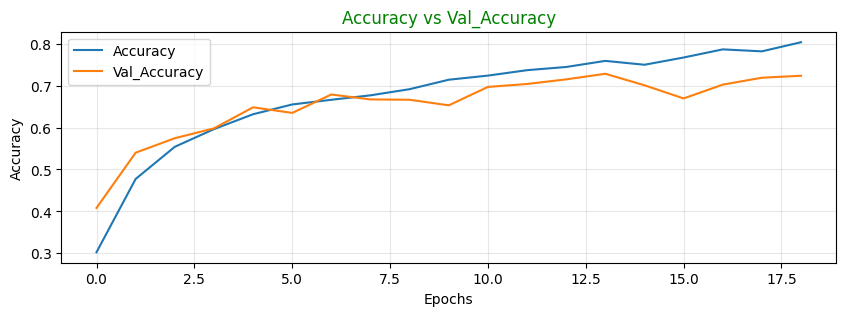

In [26]:
figsize = plt.figure(figsize=(10,3))
plt.plot(History.history['accuracy'], label='Accuracy')
plt.plot(History.history['val_accuracy'], label='Val_Accuracy')
plt.title("Accuracy vs Val_Accuracy", color='g')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Classification report & Confusion Matrix

In [27]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


report = classification_report(y_test, y_pred_classes)
print(report)

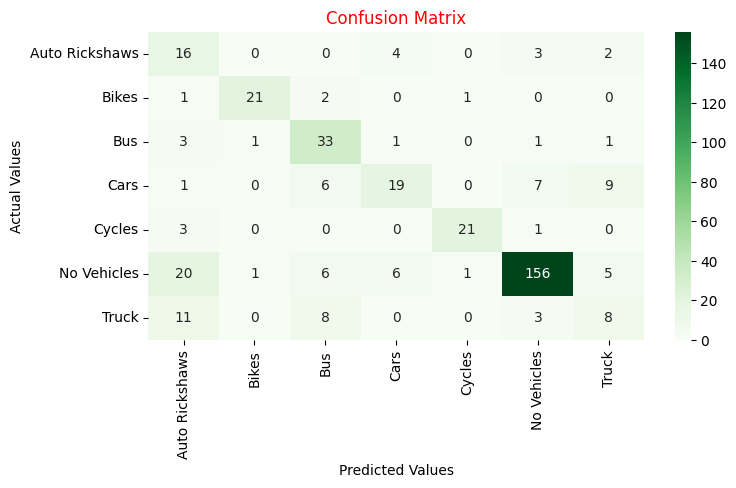

In [30]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("Confusion Matrix", color='r')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## Show Classified images

In [41]:
def show_classified_images(x_test, y_test, y_pred):
    # Find misclassified indices
    classified = np.where(y_test == y_pred)[0]

    # Randomly select 10 misclassified samples
    selected = np.random.choice(classified, size=10, replace=False)

    # Plot the misclassified images
    fig=plt.figure(figsize=(10, 4))
    for i, idx in enumerate(selected):
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.squeeze(x_test[idx]), cmap='Greens')
        plt.title(f"True: {y_test[idx]}, \nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

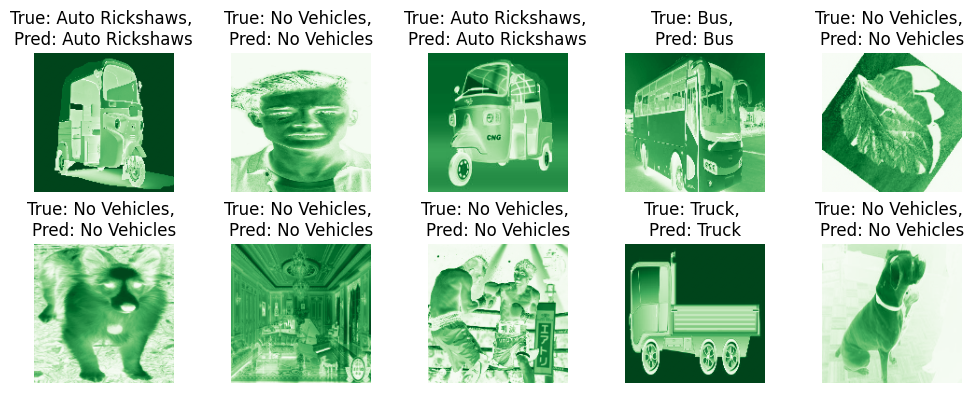

In [42]:
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred_classes)
show_classified_images(x_test, y_test_labels, y_pred_labels)

### Show nonclassified images

In [43]:
def show_nonclassified_images(x_test, y_test, y_pred):
    # Find misclassified indices
    misclassified = np.where(y_test != y_pred)[0]

    # Randomly select 10 misclassified samples
    selected = np.random.choice(misclassified, size=10, replace=False)

    # Plot the misclassified images
    fig=plt.figure(figsize=(10, 4))
    for i, idx in enumerate(selected):
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.squeeze(x_test[idx]), cmap='Reds')
        plt.title(f"True: {y_test[idx]}, \nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

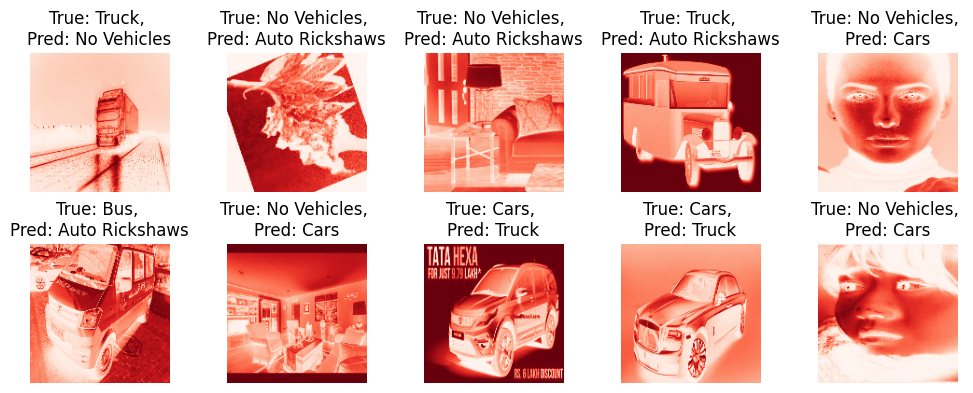

In [44]:
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred_classes)
show_nonclassified_images(x_test, y_test_labels, y_pred_labels)

In [30]:
#----------------------------------------------------------------------------------------------------------------------------

# Transfer Learning Using vggnet16

In [78]:
def read_dataset(dataset_dir, image_size, encoder, is_fit_transform = False):
    X=[]
    Y=[]
    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir,folder_name)
        for file_name in os.listdir(folder_path):
            file_path  = os.path.join(folder_path,file_name)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
            img = img.reshape((IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 3))
            X.append(img)
            Y.append(folder_name)
    # Convert to numpy arrays
    x = np.array(X, dtype=np.float32)
    x = x / 255.0  # Normalize manually (optional)
    if is_fit_transform:
        y = encoder.fit_transform(Y)
    else:
        y = encoder.transform(Y)
    return x, y

In [79]:
encoder = LabelEncoder()
x,y = read_dataset(dataset_dir, IMAGE_INPUT_SIZE, encoder, is_fit_transform = True)
x_test, y_test = read_dataset(dataset_dir_test, IMAGE_INPUT_SIZE, encoder, is_fit_transform = False)

x_train,x_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

label = len(os.listdir(dataset_dir))

(6379, 150, 150, 3)
(6379,)
(5103, 150, 150, 3)
(5103,)
(1276, 150, 150, 3)
(1276,)
(382, 150, 150, 3)
(382,)


In [80]:
# # If x_train shape is (num_samples, 150, 150, 1)
# x_train_rgb = np.repeat(x_train, 3, axis=-1)
# x_val_rgb = np.repeat(x_val, 3, axis=-1)

In [81]:
# Base Model
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [82]:
# Unfreeze some layers in the base model
for layer in conv_base.layers[:15]:
    layer.trainable = False
for layer in conv_base.layers[15:]:
    layer.trainable = True

In [83]:
vgg_model = Sequential([
    conv_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=L1(l1=0.005)),
    Dense(label, activation='softmax')
])

In [84]:
vgg_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,913,095 (72.15 MB)

 Trainable params: 11,277,831 (43.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [85]:
vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
vgg_History = vgg_model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_data = (x_val, y_val),
    callbacks=[
        EarlyStopping(patience=3, verbose=1, restore_best_weights=True)
    ]
)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.6851 - loss: 49.1828 - val_accuracy: 0.8378 - val_loss: 2.1626
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8099 - loss: 2.2341 - val_accuracy: 0.8315 - val_loss: 1.9250
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8515 - loss: 1.7688 - val_accuracy: 0.8339 - val_loss: 1.7753
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8885 - loss: 1.6429 - val_accuracy: 0.8182 - val_loss: 1.8670
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9052 - loss: 1.5424 - val_accuracy: 0.8832 - val_loss: 1.6197
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9289 - loss: 1.4359 - val_accuracy: 0.8785 - val_loss: 1.5598
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9359 - loss: 1.4108 - val_accuracy: 0.8738 - val_loss: 2.3573
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9228 - loss: 1.7664 - val_acc

In [87]:
y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 890ms/step


In [88]:
vgg_model.evaluate(x_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 814ms/step - accuracy: 0.8953 - loss: 1.6539


[1.6538751125335693, 0.8952879309654236]

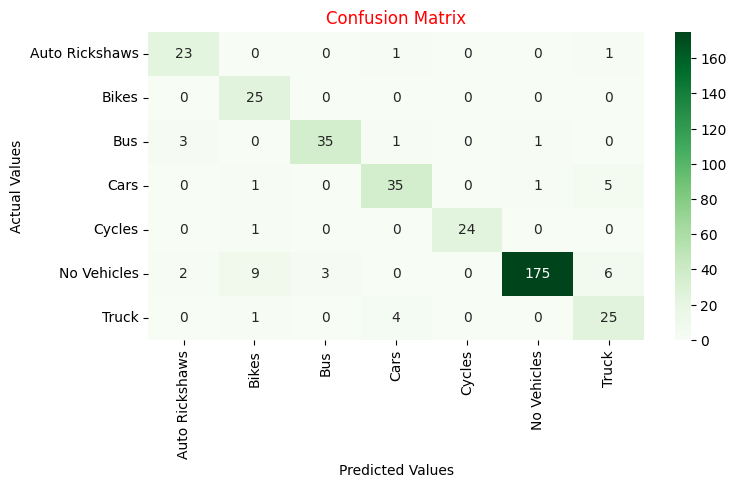

In [89]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("Confusion Matrix", color='r')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------

### Model Saving

In [113]:
#Function
class ModelWrapper():
    def __init__(self, model, encoder):
        self.model = model
        self.encoder = encoder
        
    def single_img_read(self, path):
        IMAGE_INPUT_SIZE=150
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
        plt.imshow(img)
        plt.show()
        img = img.reshape(1, IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 3)
        z = self.model.predict(img)
        index = np.argmax(z)
        print("Predicted accuracy(%):", z[0][index]*100)
        predicted_label = self.encoder.inverse_transform([index])
        if z[0][index]*100 >=60:
            print("Predicted class:", predicted_label)
        else:
            print("Predicted class: Unknown")
        
    def multiple_img_read(self, dir_link):
        IMAGE_INPUT_SIZE=150
        for i in os.listdir(dir_link):
            img_link = os.path.join(dir_link,i)
            img = cv2.imread(img_link)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
            plt.imshow(img)
            plt.show()
            img = img.reshape(1, IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 3)
            z = self.model.predict(img)
            index = np.argmax(z)
            print("Predicted accuracy:", z[0][index])
            predicted_label = self.encoder.inverse_transform([index])
            print("Predicted class:", predicted_label)
    
    def online_img_read(self, url):
        IMAGE_INPUT_SIZE = 150
        response = requests.get(url, verify=False)
        img = Image.open(BytesIO(response.content)).convert('RGB')  # Convert to grayscale
        img = img.resize((IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
        img_np = np.array(img)
        plt.imshow(img_np)
        plt.show()
        img_np = img_np.reshape(1, IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 3)
        z = self.model.predict(img_np)
        index = np.argmax(z)
        print("Predicted accuracy(%):", z[0][index]*100)
        predicted_label = self.encoder.inverse_transform([index])
        if z[0][index]*100 >=60:
            print("Predicted class:", predicted_label)
        else:
            print("Predicted class: Unknown")
        
        # Bar chart of probabilities
        category_labels = self.encoder.classes_  # Assuming encoder has all class labels
        percentages = z[0] * 100
        
        plt.figure(figsize=(7, 3))
        plt.bar(category_labels, percentages, color='green')
        plt.xlabel('Category')
        plt.ylabel('Probability (%)')
        plt.title('Predicted Class Probabilities')
        plt.ylim(0, 100)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [126]:
MyModel = ModelWrapper(vgg_model, encoder)
import joblib
MyModel.optimizer = None  # For Keras
joblib.dump(MyModel, "NewVehicleModel.pkl",compress=('xz', 3))

['NewVehicleModel.pkl']

In [129]:
vgg_model.save_weights('VehicleModel.weights.h5')

## Prediction with Single Image

In [122]:
import joblib
savedModel = joblib.load('NewVehicleModel.pkl')

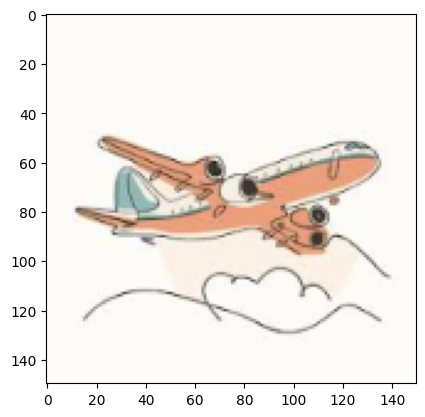

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
Predicted accuracy(%): 100.0
Predicted class: ['No Vehicles']


In [123]:
# Image 1
# First run the Libraries
url1 = r"C:\Users\ARSAMANT\OneDrive - Capgemini\Pictures\Screenshots\Plane.jpg"
img = savedModel.single_img_read(url1)

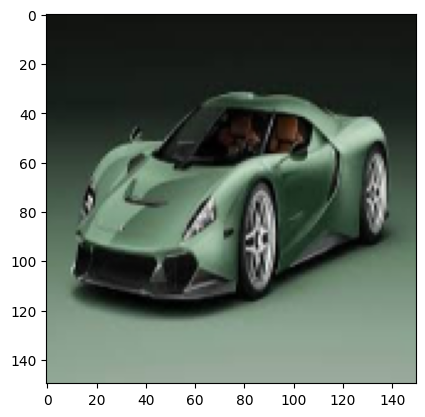

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted accuracy(%): 100.0
Predicted class: ['Cars']


In [124]:
#Image 2
url2 = r"C:\Users\ARSAMANT\OneDrive - Capgemini\Pictures\Screenshots\Car.jpg"
img = savedModel.single_img_read(url2)

C:\Users\ARSAMANT\AppData\Roaming\Python\Python313\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dolphinbusservice.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


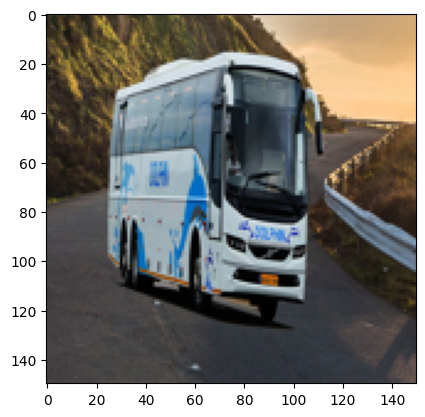

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted accuracy(%): 100.0
Predicted class: ['Bus']


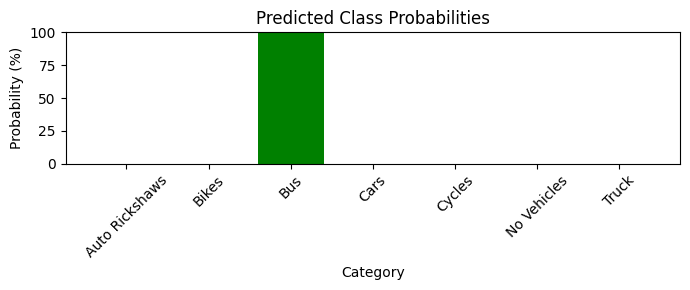

In [125]:
link = "https://dolphinbusservice.com/DolphinBusServiceCuttack/gallery/images/site/gallery5.jpg"
online_img = savedModel.online_img_read(link)

In [38]:
######################################################   THE END   ##########################################################